Project

Environment Setup

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import scipy as sp


from IPython.display import display

Helper Functions

Import Datasets

In [162]:
# import female life expectancy dataset (1960-2014) Source: World Bank

# don't include indicator name/symbol, and drop 2015,2016 which are just empty
columns_to_use = [0,1] + range(4, 59) 

# read and skip non-essential data
female_lexp = pd.read_csv('data/API_SP.DYN.LE00.FE.IN_DS2_en_csv_v2.csv', skiprows=2, header=1, usecols=columns_to_use)
male_lexp = pd.read_csv('data/API_SP.DYN.LE00.MA.IN_DS2_en_csv_v2.csv', skiprows=2, header=1, usecols=columns_to_use)

female_lexp.sort_values(by='Country Name', inplace=True)
female_lexp = female_lexp.reset_index(drop=True) 
female_lexp = female_lexp.set_index('Country Code')

male_lexp.sort_values(by='Country Name', inplace=True)
male_lexp = male_lexp.reset_index(drop=True) 
male_lexp = male_lexp.set_index('Country Code')

countries_names = female_lexp[['Country Name']].copy()
del female_lexp['Country Name']
del male_lexp['Country Name']

display(female_lexp.head(20))
display(male_lexp.head(20))

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Code,,,,,,,,,,,,,,,,,,,,,
AFG,33.105000,33.557000,34.001000,34.440000,34.875000,35.307000,35.738000,36.170000,36.603000,37.042000,...,58.151000,58.564000,58.97500,59.379000,59.772000,60.154000,60.527000,60.893000,61.256000,61.615000
ALB,63.247000,64.325000,65.261000,66.017000,66.585000,66.987000,67.273000,67.517000,67.779000,68.084000,...,79.374000,79.557000,79.69200,79.799000,79.891000,79.979000,80.072000,80.175000,80.288000,80.415000
DZA,46.865000,47.333000,47.801000,48.265000,48.723000,49.170000,49.597000,50.006000,50.404000,50.800000,...,74.357000,74.733000,75.08800,75.432000,75.767000,76.091000,76.401000,76.693000,76.965000,77.219000
ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGO,34.504000,34.910000,35.317000,35.723000,36.130000,36.537000,36.945000,37.355000,37.766000,38.175000,...,49.954000,50.433000,50.87500,51.301000,51.720000,52.138000,52.558000,52.976000,53.392000,53.805000
ATG,64.167000,64.593000,65.012000,65.425000,65.832000,66.231000,66.622000,67.005000,67.378000,67.743000,...,76.906000,77.090000,77.27200,77.450000,77.624000,77.796000,77.964000,78.129000,78.292000,78.452000
ARB,47.885584,48.463211,49.044025,49.633839,50.234404,50.839882,51.439349,52.023934,52.590522,53.143938,...,70.628515,70.862898,71.08674,71.302967,71.515599,71.718698,71.918245,72.101914,72.301615,72.501972
ARG,68.154000,68.362000,68.536000,68.685000,68.820000,68.958000,69.111000,69.289000,69.495000,69.733000,...,78.581000,78.760000,78.93400,79.103000,79.270000,79.434000,79.595000,79.754000,79.909000,80.060000


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Code,,,,,,,,,,,,,,,,,,,,,
AFG,31.589000,32.035000,32.476000,32.91300,33.348000,33.781000,34.214000,34.646000,35.079000,35.516000,...,55.957000,56.355000,56.747000,57.126000,57.491000,57.844000,58.186000,58.524000,58.859000,59.193000
ALB,61.309000,62.272000,63.117000,63.81100,64.346000,64.723000,64.962000,65.116000,65.233000,65.346000,...,72.946000,73.171000,73.402000,73.655000,73.935000,74.235000,74.544000,74.843000,75.119000,75.369000
DZA,45.440000,45.883000,46.325000,46.76400,47.198000,47.620000,48.023000,48.408000,48.781000,49.152000,...,70.139000,70.486000,70.813000,71.112000,71.382000,71.626000,71.850000,72.068000,72.287000,72.512000
ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGO,31.538000,31.935000,32.331000,32.72700,33.124000,33.521000,33.919000,34.319000,34.720000,35.120000,...,47.191000,47.649000,48.065000,48.463000,48.852000,49.241000,49.632000,50.024000,50.413000,50.802000
ATG,59.512000,59.912000,60.300000,60.67600,61.042000,61.399000,61.748000,62.091000,62.427000,62.757000,...,72.063000,72.264000,72.452000,72.626000,72.788000,72.940000,73.087000,73.234000,73.385000,73.543000
ARB,45.866613,46.448504,47.024067,47.59628,48.165099,48.726935,49.273502,49.801863,50.313983,50.817026,...,66.987896,67.215467,67.441586,67.648658,67.842607,68.029814,68.192869,68.370386,68.562426,68.757595
ARG,62.417000,62.459000,62.477000,62.48500,62.499000,62.536000,62.612000,62.731000,62.893000,63.099000,...,70.980000,71.126000,71.271000,71.417000,71.567000,71.724000,71.891000,72.066000,72.250000,72.443000


Clean and prep data for use

In [167]:
# which countries are missing all data from the date range?

year_col_labels = list(female_lexp.columns.values) # same for male


filtered_countries_female = female_lexp.dropna(thresh=1) # must have at least 1 data point plus 
countries_wo_data_female  = female_lexp[~female_lexp.index.isin(filtered_countries_female.index)]

filtered_countries_male = male_lexp.dropna(thresh=1) # must have at least 1 data point plus 
countries_wo_data_male  = male_lexp[~male_lexp.index.isin(filtered_countries_male.index)]

display( countries_names.merge(countries_wo_data_female,left_index=True,right_index=True) )
display( countries_names.merge(countries_wo_data_male,left_index=True,right_index=True) )


,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Code,,,,,,,,,,,,,,,,,,,,,
ASM,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AND,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VGB,British Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CYM,Cayman Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GIB,Gibraltar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MCO,Monaco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NRU,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MNP,Northern Mariana Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INX,Not classified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Code,,,,,,,,,,,,,,,,,,,,,
ASM,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AND,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VGB,British Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CYM,Cayman Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GIB,Gibraltar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MCO,Monaco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NRU,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MNP,Northern Mariana Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INX,Not classified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
# What other countries have gaps in their data?

countries_missing_data_female = filtered_countries_female.loc[filtered_countries_female.isnull().any(axis=1),:]
countries_missing_data_male = filtered_countries_male.loc[filtered_countries_male.isnull().any(axis=1),:]

display( countries_names_female.merge(countries_missing_data_female,left_index=True,right_index=True) )
display( countries_names_male.merge(countries_missing_data_male,left_index=True,right_index=True) )


,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Code,,,,,,,,,,,,,,,,,,,,,
BMU,Bermuda,NaN,NaN,NaN,NaN,NaN,72.35,NaN,NaN,NaN,...,81.400,81.500,81.700,81.900,82.100000,82.080000,85.030000,85.550,84.460,84.69
CUW,Curacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,78.500,79.000,79.100,80.100000,NaN,80.700000,NaN,NaN,81.00
DMA,Dominica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FRO,Faroe Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.800,82.200,82.500,82.800,83.000000,83.200000,83.500000,83.700,83.900,84.10
GRL,Greenland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71.920,72.070,72.180,72.800,72.870000,73.290000,73.690000,73.650,NaN,NaN
IMN,Isle of Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ISR,Israel,NaN,73.62,73.7,NaN,NaN,NaN,73.73,73.2,72.88,...,82.200,82.500,82.400,83.000,83.300000,83.600000,83.500000,83.600,83.900,84.10
XKX,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71.000,71.200,71.400,71.600,71.800000,72.000000,72.300000,72.700,73.000,73.30
LIE,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.100,83.100,83.600,85.500,83.600000,84.300000,84.200000,85.200,83.900,83.90


,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Code,,,,,,,,,,,,,,,,,,,,,
BMU,Bermuda,NaN,NaN,NaN,NaN,NaN,65.61,NaN,NaN,NaN,...,76.100,76.400,76.300,76.700,76.806000,76.630000,77.460000,77.990,76.870,77.090
CUW,Curacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,71.100,71.900,71.700,72.400000,NaN,74.400000,NaN,NaN,74.800
DMA,Dominica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FRO,Faroe Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.900,77.100,77.300,77.600,77.900000,78.200000,78.500000,78.800,79.100,79.400
GRL,Greenland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66.650,67.090,67.890,67.750,68.180000,68.540000,68.560000,69.080,NaN,NaN
IMN,Isle of Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ISR,Israel,NaN,70.47,70.6,NaN,NaN,NaN,70.91,69.9,69.32,...,78.200,78.700,78.700,79.000,79.600000,79.700000,79.900000,79.900,80.300,80.300
XKX,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66.500,66.800,67.100,67.300,67.600000,67.900000,68.100000,68.400,68.700,69.000
LIE,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.400,78.900,79.100,80.000,79.500000,79.500000,79.500000,79.700,80.700,80.700


Graph Intial Data

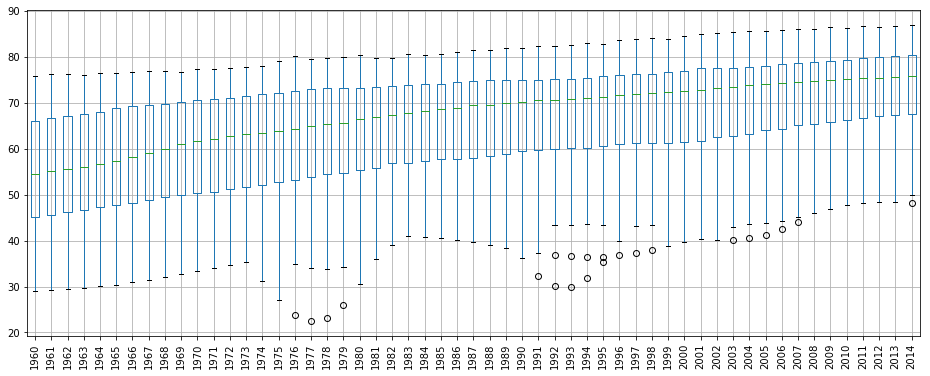

In [92]:
plt.rcParams['figure.figsize'] = (16,6)
plt.figure();
filtered_countries_female.boxplot(rot=90)

In [170]:
# find row index which has minimum value (i.e. life expectancy) for each column (years)
s = filtered_countries_female.idxmin(axis=0)
s2 = filtered_countries_female.min(axis=0)
unique_codes = s.unique()
outlier_female = pd.DataFrame(data=[s.values,s2.values],columns=s.index)
for code in unique_codes:
    outlier_female.replace(to_replace=code,value=countries_names.ix[code,0], inplace=True)

print outlier_female.head(2).T

                 0       1
1960          Mali  29.026
1961          Mali   29.21
1962          Mali  29.432
1963          Mali  29.704
1964          Mali  30.033
1965          Mali  30.429
1966          Mali  30.896
1967          Mali  31.424
1968          Mali  32.006
1969          Mali  32.633
1970          Mali  33.296
1971          Mali  33.984
1972          Mali  34.688
1973          Mali  35.399
1974      Cambodia  31.262
1975      Cambodia  26.991
1976      Cambodia  23.806
1977      Cambodia  22.394
1978      Cambodia  23.113
1979      Cambodia  25.944
1980      Cambodia  30.491
1981      Cambodia  36.036
1982   Timor-Leste   39.08
1983         Niger      41
1984  Sierra Leone  40.825
1985  Sierra Leone  40.522
1986  Sierra Leone  40.106
1987  Sierra Leone  39.597
1988  Sierra Leone  39.027
1989  Sierra Leone  38.435
1990        Rwanda  36.105
1991        Rwanda  32.357
1992        Rwanda  30.186
1993        Rwanda  30.002
1994        Rwanda  31.839
1995        Rwanda  35.351
1

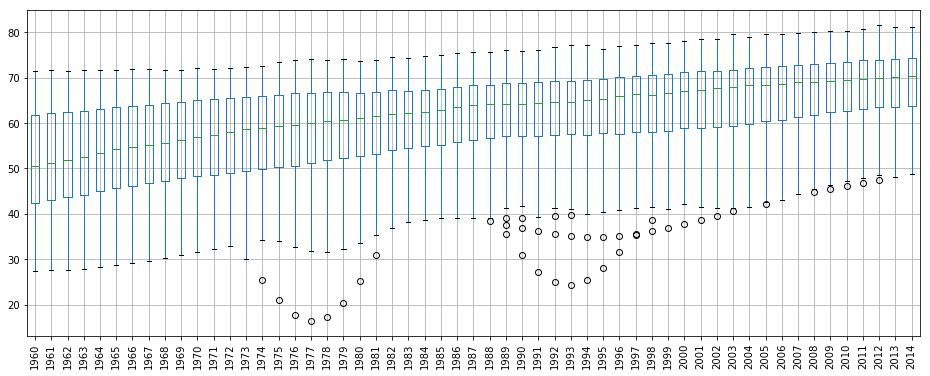

In [169]:
plt.rcParams['figure.figsize'] = (16,6)
plt.figure();
filtered_countries_male.boxplot(rot=90)

In [171]:
# find row index which has minimum value (i.e. life expectancy) for each column (years)
s_male = filtered_countries_male.idxmin(axis=0)
s2_male = filtered_countries_male.min(axis=0)
unique_codes = s_male.unique()
outlier_male = pd.DataFrame(data=[s_male.values,s2_male.values],columns=s_male.index)
for code in unique_codes:
    outlier_male.replace(to_replace=code,value=countries_names.ix[code,0], inplace=True)

print outlier_male.head(2).T

                             0       1
1960                      Mali  27.436
1961                      Mali  27.548
1962                      Mali  27.707
1963                      Mali  27.932
1964                      Mali  28.233
1965                      Mali  28.619
1966                      Mali   29.09
1967                      Mali  29.631
1968                      Mali  30.225
1969                      Mali  30.863
1970                      Mali  31.533
1971                      Mali  32.222
1972                      Mali  32.925
1973                  Cambodia  30.088
1974                  Cambodia  25.398
1975                  Cambodia  20.926
1976                  Cambodia  17.657
1977                  Cambodia  16.286
1978                  Cambodia  17.162
1979                  Cambodia  20.253
1980                  Cambodia  25.118
1981                  Cambodia  30.987
1982                  Cambodia  36.847
1983               South Sudan  38.286
1984               South 

What's Happening In The Outlier Data Points?

FEMALE DATA:

Cambodia (~1974-1981): Cambodian Civil War (1970-1975),  Khmer Rouge regime (1975-1979) 
"Khmer Rouge Killing Fields" State-sponsored genocide, 1+ million people killed

Sierra Leone (~1996-2000): Sierra Leone Civil War (1991–2002) 50K+ people killed
 1985 Major General Joseph Momoh takes power for 7yrs, country rapidly declines.
 Bulk of Sierra Leone’s youth during the late 1980s roamed the streets aimlessly.
 One of the main geographical "Blood Diamond" locations.
 
Rwanda (~1990-1995): Rwandan Civil War (1990-1994), Rwandan genocide (~1994) 800K+ people killed in 100 days. 

Zimbabwe (~2001-2008): Trend down actually begins 1991. Robert Gabriel Mugabe becomes President in 1987. Encourages 
 violent seizure of white-owned land in 2000. Severely impacts with food production. Mass hunger. International
 sancations contribute to a devestated economy.
 
Swaziland (~2011-2014): Trend down actually begins in 1993. Major health issues: Tuberculosis and HIV/AIDS.
 WHO data in 2002 shows that 64% of all deaths in the country were caused by HIV/AIDS.
 
MALE DATA:

Cambodia (~1973-1982): Cambodian Civil War (1970-1975),  Khmer Rouge regime (1975-1979) 
 "Khmer Rouge Killing Fields" State-sponsored genocide, 1+ million people killed
 Trend down begins in 1970.
 
 Sierra Leone (~1996-2000): Sierra Leone Civil War (1991–2002) 50K+ people killed
 1985 Major General Joseph Momoh takes power for 7yrs, country rapidly declines.
 Bulk of Sierra Leone’s youth during the late 1980s roamed the streets aimlessly.
 One of the main geographical "Blood Diamond" locations.
 
Rwanda (~1990-1995): Rwandan Civil War (1990-1994), Rwandan genocide (~1994) 800K+ people killed in 100 days. 

Zimbabwe (~2001-2008): Trend down actually begins 1991. Robert Gabriel Mugabe becomes President in 1987. Encourages 
 violent seizure of white-owned land in 2000. Severely impacts with food production. Mass hunger. International
 sancations contribute to a devestated economy.

Central African Republic (2007-2014): Minor downward trend was actually from 1989-2003, Sporadic fighting. The United Nations estimates that approximately 11% of the  population aged between 15 and 49 is HIV positive.

In [184]:
countries_names[countries_names['Country Name'] == 'Central African Republic'].index.tolist()

['CAF']

In [183]:
filtered_countries_male.ix['CAF']

1960    34.948
1961    35.344
1962    35.750
1963    36.174
1964    36.620
1965    37.100
1966    37.623
1967    38.191
1968    38.803
1969    39.457
1970    40.152
1971    40.887
1972    41.649
1973    42.420
1974    43.183
1975    43.918
1976    44.607
1977    45.238
1978    45.800
1979    46.281
1980    46.676
1981    46.984
1982    47.214
1983    47.376
1984    47.471
1985    47.500
1986    47.462
1987    47.360
1988    47.198
1989    46.984
1990    46.720
1991    46.407
1992    46.052
1993    45.667
1994    45.265
1995    44.856
1996    44.445
1997    44.041
1998    43.662
1999    43.329
2000    43.069
2001    42.905
2002    42.850
2003    42.910
2004    43.087
2005    43.382
2006    43.788
2007    44.283
2008    44.844
2009    45.454
2010    46.098
2011    46.768
2012    47.457
2013    48.155
2014    48.849
Name: CAF, dtype: float64

In [ ]:
x = np.linspace(-4,4,100)
y = norm_dist.pdf(x)

plt.plot(x,y)